# Visualize White Box Results

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from matplotlib.ticker import PercentFormatter

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 7
plt.rcParams["axes.labelsize"] = 7
plt.rcParams["axes.titlesize"] = 7
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams["ytick.labelsize"] = 7
plt.rcParams["legend.fontsize"] = 7
plt.rcParams["figure.titlesize"] = 7
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["ytick.major.width"] = 0.5
plt.rcParams["xtick.minor.width"] = 0.5
plt.rcParams["ytick.minor.width"] = 0.5
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["svg.fonttype"] = "none"

df = pd.read_csv("whitebox_results_full.csv.gz", sep="\t")
df["algorithm"] = df["algorithm"].str.replace("SSSR", "Ours")
df

,dataset,algorithm,random_state,process_time,target_noise,feature_noise,true_model,symbolic_model,model_size,r2_train,r2_test,simplified_symbolic_model,simplified_complexity,r2_zero_test,data_group,symbolic_solution
0,feynman_III_10_19,FEAT,29910,7472.385775,0.001,0.0,mom*sqrt(Bx**2 + By**2 + Bz**2),16.4356+-9.06*(0.1340*(0.0948*x_0-0.4616*(0.03...,441,0.999902,0.999911,0.003*Bx*mom - 3.36*Bx + 0.069*By + 1.01*By*ex...,255.0,0.999911,Feynman,False
1,feynman_III_10_19,AFP,14423,3936.777982,0.000,0.0,mom*sqrt(Bx**2 + By**2 + Bz**2),(((x_1+x_2)*(0.604*x_0))+((x_0*0.602)*x_3)),49,0.991632,0.991223,mom*(0.604*Bx + 0.604*By + 0.602*Bz),12.0,0.991223,Feynman,False
2,feynman_III_10_19,AFP,14423,2385.397533,0.001,0.0,mom*sqrt(Bx**2 + By**2 + Bz**2),(((x_0*(sqrt(|sqrt(|(0.946-(0.066+sin(x_1)))|)...,27,0.976033,0.975142,Bx + sqrt(By)*mom - 1.094*Bz + mom*(Bz + (0.88...,26.0,0.975142,Feynman,False
3,feynman_III_10_19,AFP,14423,3025.368774,0.010,0.0,mom*sqrt(Bx**2 + By**2 + Bz**2),((x_3+(sqrt(|((x_3+((x_2^2)+(sqrt(|(((x_1-cos(...,60,0.996958,0.997409,Bz + mom*sqrt(Bx**2 + By**2 + 2*Bz + sqrt(Bx +...,61.0,0.997409,Feynman,False
4,feynman_III_10_19,AFP,28020,2797.763313,0.000,0.0,mom*sqrt(Bx**2 + By**2 + Bz**2),(x_0*(x_2+sqrt(|(x_3*(x_1-(((1.295*sqrt(|x_2|)...,19,0.976821,0.975573,mom*(By + sqrt(Bz*(Bx - sqrt(Bz)*(1.29*sqrt(By...,26.0,0.975573,Feynman,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82290,feynman_I_24_6,Ours,16850,943.689244,0.100,0.0,0.25 * m * x ** 2 * (omega ** 2 + omega_0 ** 2),6.80997 * omega_0 + 0.290784 * m + 0.655004 * ...,34,0.958704,0.989018,-1.489179860422326 * omega_0 + 1.2625061484538...,34.0,0.989018,Feynman,False
82291,feynman_I_13_12,Ours,4426,661.970123,0.100,0.0,G * m1 * m2 * (1 / (r2) - 1 / (r1)),4.278036 * r2 + 4.044392 * m2 + 4.348252 * r1 ...,44,0.752541,0.729049,-4.859272481080944 * r2 + 1.314035040829989 * ...,44.0,0.729049,Feynman,False
82292,feynman_III_9_52,Ours,4426,661.506547,0.100,0.0,25.132741228718345 * Ef * p_d * sin(0.5 * t * ...,0.257568 * omega + 5.757275 * sin(omega_0) + 6...,41,0.656794,0.671661,1.3973537289504439 * omega + -16.6547951048127...,41.0,0.671661,Feynman,False
82293,feynman_II_36_38,Ours,21962,1033.373098,0.100,0.0,H * mom / (T * kb) + M * alpha * mom / (T * c ...,5.408353182847762 * M ** 0.091 * T ** -0.942 *...,45,-2.235814,-2.183707,5.408353182847762 * M ** 0.091 * T ** -0.942 *...,45.0,0.000000,Feynman,False


In [3]:
algorithm_list = (
    df.groupby("algorithm")
    .agg({"symbolic_solution": "mean"})
    .sort_values("symbolic_solution", ascending=True)
    .index.tolist()
)

alg_list = {
    ## 回归方法
    "FEAT": "Regression",
    ## 生成方法
    "NeurSR": "Generative",
    "E2ESR": "Generative",
    "SNIP": "Generative",
    ## 搜索方法
    # 遗传算法
    "GPlearn": "Search",
    "AFP": "Search",
    "AFP-FE": "Search",
    "EPLEX": "Search",
    "SBP-GP": "Search",
    "GP-GOMEA": "Search",
    "Operon": "Search",
    # MCTS
    "SPL": "Search",
    # 深度强化学习
    "DSR": "Search",
    "RSRM": "Search",
    # 综合方法
    "AIFeynman2": "Search",
    "BSR": "Search",
    # Ours
    "Ours": "Search",
}

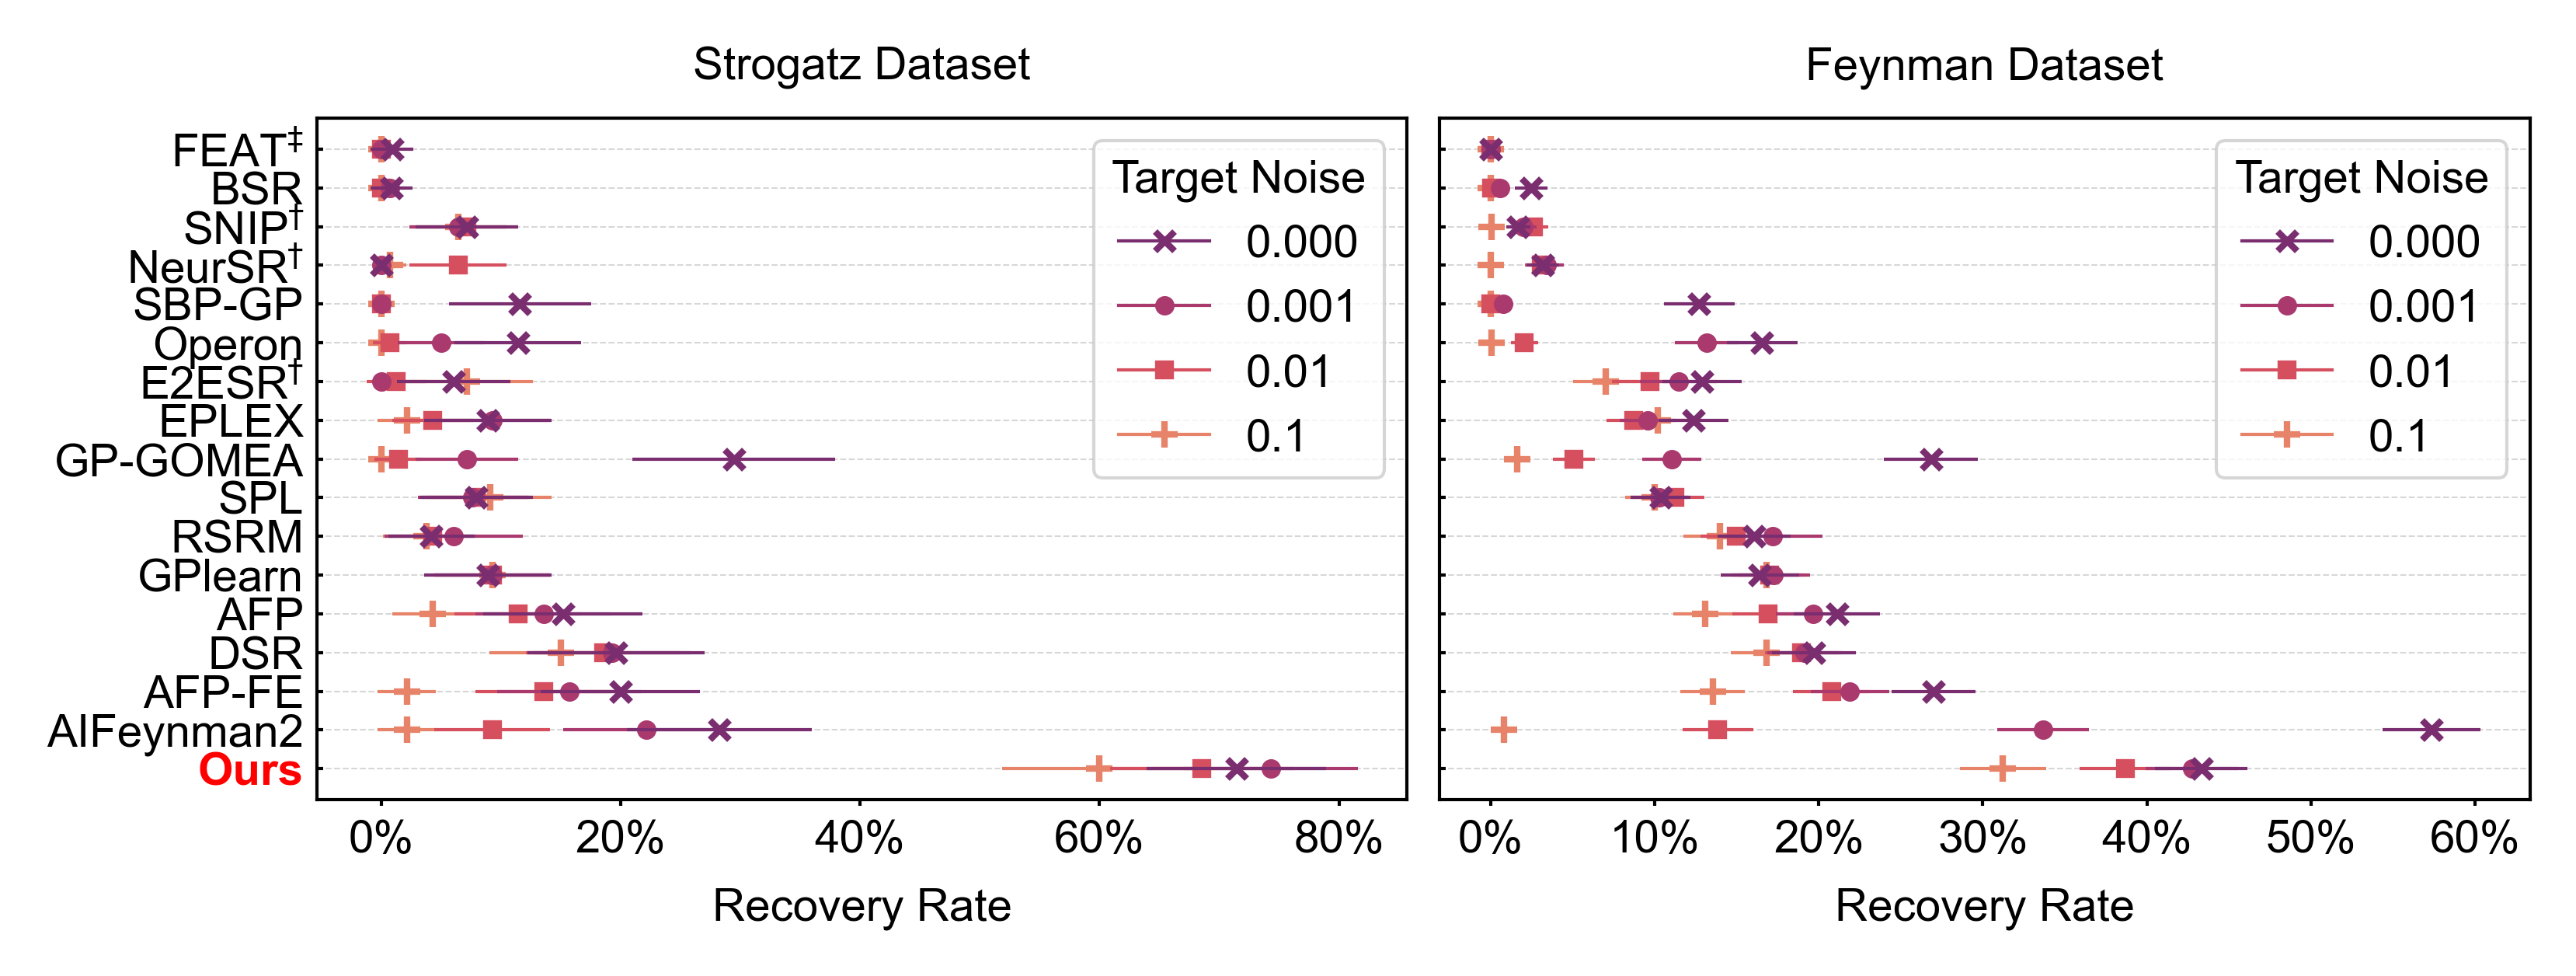

In [4]:
fig, axes = plt.subplots(
    1,
    2,
    figsize=(5.511811023622047, 2.156468722659667),
    dpi=600,
    sharex=False,
    sharey=True,
)
fig.subplots_adjust(
    left=0.1259920634920635,
    right=0.9874007936507937,
    top=0.871188589540412,
    bottom=0.193217115689382,
    wspace=0.029686769518466577,
    hspace=0.1899953249181861,
)
axes = axes.ravel()

for idx, data_group in enumerate(["Strogatz", "Feynman"]):
    ax = axes[idx]
    ax.clear()

    df_plot = df.copy()
    df_plot = df_plot[df_plot["data_group"] == data_group]
    df_plot["x"] = df_plot["symbolic_solution"]

    # df_plot = df_plot[df_plot['random_state'] == 29910]

    style = {
        0.000: dict(color="#7a2e70", fmt="x", label="0.000", markersize=3, zorder=200),
        0.001: dict(color="#aa3a6e", fmt="o", label="0.001", markersize=2, zorder=190),
        0.01: dict(color="#d64f5f", fmt="s", label="0.01", markersize=2, zorder=180),
        0.1: dict(color="#e78369", fmt="+", label="0.1", markersize=4, zorder=170),
    }

    for (algorithm, target_noise), g in df_plot.groupby(["algorithm", "target_noise"]):
        idx = algorithm_list.index(algorithm)
        mu = g["x"].mean()
        ci95 = g["x"].std() * 1.96 / np.sqrt(len(g))
        ax.errorbar(mu, -idx, xerr=ci95, edgecolor=None, **style[target_noise])

    ax.tick_params(axis="x", which="major", length=1, pad=2, labelsize=7)
    ax.tick_params(
        axis="y", which="major", length=1, direction="in", pad=2, labelsize=7
    )

    algorithm_list2 = deepcopy(algorithm_list)
    for idx, alg in enumerate(algorithm_list2):
        algorithm_list2[idx] += {
            "Search": "",
            "Generative": r"$\!{}^\dagger$",
            "Regression": r"${}^\ddag$",
        }.get(alg_list[alg])

    ax.set_yticks(-np.arange(len(algorithm_list2)), algorithm_list2)
    ax.grid(axis="y", linestyle="--", alpha=0.5, zorder=0, lw=0.5 * 0.5)
    ax.set_title(data_group + " Dataset", fontsize=7)
    ax.xaxis.set_major_formatter(PercentFormatter(1))
    ax.set_xlabel("Recovery Rate", fontsize=7)
    for tick in ax.get_yticklabels():
        if "ours" in tick.get_text().lower():
            tick.set_fontweight("bold")
            tick.set_color("red")

    ax.legend(
        [
            plt.Line2D(
                [0],
                [0],
                color=v["color"],
                marker=v["fmt"],
                markersize=v["markersize"],
                linestyle="-",
                label=k,
            )
            for k, v in style.items()
        ],
        [style[k]["label"] for k in style],
        title="Target Noise",
        fontsize=7,
        title_fontsize=7,
        loc="upper right",
    ).get_frame().set_linewidth(0.5)

os.makedirs("./plot", exist_ok=True)
fig.savefig("./plot/main_result2.pdf")
# fig.savefig('./plot/main_result2.png')
# fig.savefig('./plot/main_result2.svg')
# clear_svg('./plot/main_result2.svg')

# Visualize Blackbox Results

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from matplotlib.ticker import PercentFormatter

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 7
plt.rcParams["axes.labelsize"] = 7
plt.rcParams["axes.titlesize"] = 7
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams["ytick.labelsize"] = 7
plt.rcParams["legend.fontsize"] = 7
plt.rcParams["figure.titlesize"] = 7
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["ytick.major.width"] = 0.5
plt.rcParams["xtick.minor.width"] = 0.5
plt.rcParams["ytick.minor.width"] = 0.5
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["svg.fonttype"] = "none"

df = pd.read_csv('./blackbox_results_full.csv.gz', sep='\t')
df

,dataset,algorithm,random_state,training time (s),model_size,symbolic_model,mse_test,mae_test,r2_test,params_str,training time (hr),r2_zero_test,friedman_dataset,symbolic_alg,mse_train,mae_train,r2_train,r2_zero_train,hash,r2_test_clip_zero
0,1027_ESL,AdaBoost,11284,32.140310,14962,not implemented,0.474719,0.524467,0.765888,"{'learning_rate': 0.01, 'loss': 'linear', 'n_e...",0.008928,0.765888,False,False,NaN,NaN,NaN,NaN,NaN,0.765888
1,1027_ESL,AdaBoost,11964,30.652193,14986,not implemented,0.364587,0.460950,0.828411,"{'learning_rate': 0.01, 'loss': 'linear', 'n_e...",0.008514,0.828411,False,False,NaN,NaN,NaN,NaN,NaN,0.828411
2,1027_ESL,AdaBoost,15795,25.045438,3176,not implemented,0.343520,0.457305,0.833438,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",0.006957,0.833438,False,False,NaN,NaN,NaN,NaN,NaN,0.833438
3,1027_ESL,AdaBoost,21575,31.495630,3223,not implemented,0.486905,0.523346,0.813623,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",0.008749,0.813623,False,False,NaN,NaN,NaN,NaN,NaN,0.813623
4,1027_ESL,AdaBoost,22118,21.049579,14992,not implemented,0.317529,0.419290,0.830149,"{'learning_rate': 0.01, 'loss': 'linear', 'n_e...",0.005847,0.830149,False,False,NaN,NaN,NaN,NaN,NaN,0.830149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30218,584_fri_c4_500_25,Ours,21575,613.295161,32,0.011312 * oz7 + 2.917502 * oz2 + 0.355212 * o...,0.387303,0.508779,0.563427,"{'binary': ['Mul', 'Div', 'Add', 'Sub'], 'c': ...",0.170360,0.629925,True,True,0.380578,0.501036,0.629925,0.629925,/data/yuzihan/WorkSpace/23-AutoAIFeynman/srben...,0.629925
30219,542_pollution,Ours,21575,413.573775,29,1.275125 * NOX + 16.357728 * cos(HUMID) + 6.20...,1674.054865,34.620506,0.452022,"{'binary': ['Mul', 'Div', 'Add', 'Sub'], 'c': ...",0.114882,0.727853,False,True,1004.407366,26.108268,0.727853,0.727853,/data/yuzihan/WorkSpace/23-AutoAIFeynman/srben...,0.727853
30220,616_fri_c4_500_50,Ours,29802,881.640586,31,0.058337 * oz35 + 0.07118 * oz11 + 0.079653 * ...,0.424811,0.531308,0.609592,"{'binary': ['Mul', 'Div', 'Add', 'Sub'], 'c': ...",0.244900,0.541638,True,True,0.443013,0.524171,0.541638,0.541638,/data/yuzihan/WorkSpace/23-AutoAIFeynman/srben...,0.541638
30221,603_fri_c0_250_50,Ours,11284,900.097889,31,0.299272 * oz5 + 0.415014 * oz1 + 0.357579 * o...,0.274771,0.364479,0.750261,"{'binary': ['Mul', 'Div', 'Add', 'Sub'], 'c': ...",0.250027,0.847516,True,True,0.146349,0.292394,0.847516,0.847516,/data/yuzihan/WorkSpace/23-AutoAIFeynman/srben...,0.847516


In [6]:
def is_dominated(p, q, less_x_is_better, less_y_is_better):
    # 判断 q 是否支配了 p
    flags = np.sign(q - p) # 若 flags 的所有元素都大于等于 0，且至少有一个元素大于 0，则 q 支配了 p
    if less_x_is_better: flags[0] = -flags[0]
    if less_y_is_better: flags[1] = -flags[1]
    return np.all(flags >= 0) and np.any(flags > 0)


def pareto(points, less_x_is_better=False, less_y_is_better=False, return_idx=True):
    # 将点集分为多层 Pareto 前沿
    remaining = list(range(len(points)))
    while len(remaining) > 0:
        pareto_front = []
        for p_idx in remaining:
            for q_idx in remaining:
                if is_dominated(points[p_idx], points[q_idx], less_x_is_better, less_y_is_better): break
            else:
                pareto_front.append(p_idx)
        yield pareto_front if return_idx else points[pareto_front]
        remaining = [i for i in remaining if i not in pareto_front]


In [7]:
alg_list = {
    ## 回归方法
    "FEAT": "Regression",
    "MLP": "Regression",
    "Linear": "Regression",
    "KernelRidge": "Regression",
    ## 生成方法
    "NeurSR": "Generative",
    "E2ESR": "Generative",
    "SNIP": "Generative",
    ## 决策树方法
    "XGB": "Decision Tree",
    "AdaBoost": "Decision Tree",
    "LGBM": "Decision Tree",
    "RandomForest": "Decision Tree",
    ## 搜索方法
    'GPlearn': 'Search',
    'AFP': 'Search',
    'AFP-FE': 'Search',
    'ITEA': 'Search',
    'EPLEX': 'Search',
    'MRGP': 'Search',
    'SBP-GP': 'Search',
    'GP-GOMEA': 'Search',
    'Operon': 'Search',
    "DSR": 'Search',
    "AIFeynman2": 'Search',
    "FFX": 'Search',
    "BSR": 'Search',
    'Ours': 'Search',
}

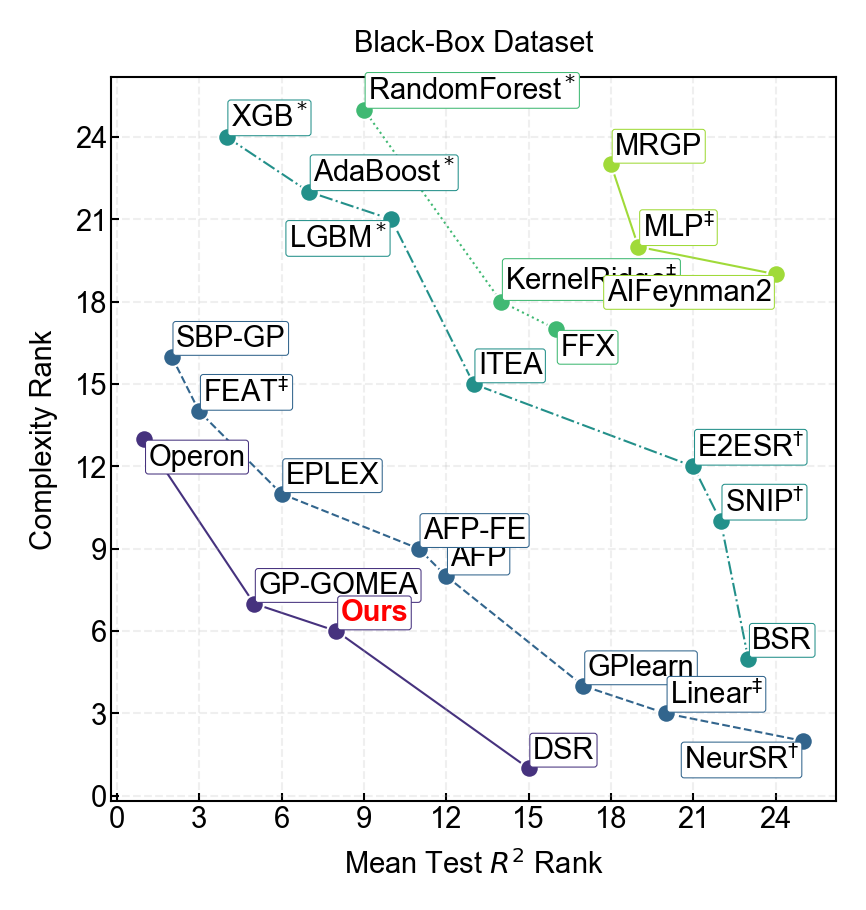

In [8]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('my_viridis', ['#46327e', '#365c8d', '#277f8e', '#1fa187', '#4ac16d', '#a0da39'])

fig, ax = plt.subplots(1, 1, figsize=(2.7559055118110236, 2.853127734033246), dpi=300, sharex=False, sharey=False)
fig.subplots_adjust(left=0.10583333333333333, right=0.9823611111111111, top=0.9318486718540381, bottom=0.08518916018245237, wspace=0.12074156235144985, hspace=0.08049437490096656)

# 设置成 False 以绘制绝对值而非排名值
plot_rank = True

x_list = []
y_list = []
t_list = []
xerr_list = []
yerr_list = []
x_label = 'Mean Test $R^2$'
y_label = 'Complexity'
for alg, g in df.groupby('algorithm'):
    x = g['r2_test_clip_zero'] # .fillna(g['r2_zero_test'])
    y = g['model_size']
    if alg == 'e2esr': alg = 'E2ESR'
    if alg == 'neuralsr': alg = 'NeuralSR'
    if alg == 'snip': alg = 'SNIP'
    if alg == 'gplearn': alg = 'GPlearn'
    if alg == 'AFP_FE': alg = 'AFP-FE'
    if alg == 'sssr': alg = 'ours'
    x_list.append(x.mean())
    y_list.append(y.mean())
    t_list.append(alg)
    xerr_list.append(1.96 * x.std() / np.sqrt(len(g)))
    yerr_list.append(1.96 * y.std() / np.sqrt(len(g)))

x_list = np.array(x_list)
y_list = np.array(y_list)
t_list = np.array(t_list)
xerr_list = np.array(xerr_list)
yerr_list = np.array(yerr_list)
points = np.array(list(zip(x_list, y_list)))
pareto_list = list(pareto(points, less_y_is_better=True))

if plot_rank:
    x_rank = np.empty_like(x_list); x_rank[np.argsort(x_list)] = np.arange(len(x_list), 0, -1)
    y_rank = np.empty_like(y_list); y_rank[np.argsort(y_list)] = np.arange(1, len(y_list) + 1)
    points = np.array(list(zip(x_rank, y_rank)))
    pareto_list = list(pareto(points, less_y_is_better=True, less_x_is_better=True))
    x_label += ' Rank'
    y_label += ' Rank'


hva_dict = {
    'Operon': ('left', 'top'),
    'NeurSR': ('right', 'top'),
    'AIFeynman2': ('right', 'top'),
    'LGBM': ('right', 'top'),
    'FFX': ('left', 'top'),
}

texts = []
for i, front_idx in enumerate(pareto_list):
    color = cmap(i / (len(pareto_list)-1))

    ax.scatter(*points[front_idx, :].T, label=f'Layer {i+1}', color=color, s=20, ec='white', lw=0.5, zorder=len(pareto_list)+10-i)
    if not plot_rank:
        ax.errorbar(x_list[front_idx], y_list[front_idx], xerr=xerr_list[front_idx], yerr=yerr_list[front_idx], fmt='none', ecolor=color, lw=0.5/2)
    
    for idx in front_idx:
        text = t_list[idx]
        ha, va = hva_dict.get(text, ('left', 'bottom'))
        xytext = (1 if ha == 'left' else -1, 1 if va == 'bottom' else -1)
        text += {'Search': '', 'Generative': r'$\!{}^\dagger$', 'Regression': r'${}^\ddag$', 'Decision Tree': r'${}^*$'}.get(alg_list[text])
        annotate = ax.annotate(text, (points[idx, 0], points[idx, 1]), fontsize=7, zorder=len(pareto_list)+20,
                    textcoords="offset points", xytext=xytext, ha=ha, va=va,
                    bbox=dict(facecolor='#ffffff', edgecolor=color, boxstyle='round,pad=0.1', lw=0.5/2, alpha=1.0),
                    # arrowprops=dict(arrowstyle='-', lw=0.5, color='#b2bec3', alpha=0.8, connectionstyle='arc3,rad=0.0'),
                    fontweight='bold' if 'ours' in text.lower() else 'normal',
                    color='red' if 'ours' in text.lower() else 'black'
        )
        texts.append(annotate)
                
    if len(front_idx) == 1: continue
    front = np.array(sorted(points[front_idx], key=lambda x: x[0]))
    ax.plot(*front.T, color=color, zorder=0, linestyle=['-', '--', '-.', ':'][i % 4])
ax.grid('on', zorder=0, linestyle='--', alpha=0.2)
ax.set_xlabel(x_label, fontsize=7)
ax.set_ylabel(y_label, fontsize=7)
ax.tick_params(axis='both', which='major', labelsize=7, direction='in', length=2, width=0.5, pad=1.0)
ax.set_title(f'Black-Box Dataset', fontsize=7)
if not plot_rank:
    ax.semilogy()
    # ax.xaxis.set_major_formatter(PercentFormatter(1))
if plot_rank:
    from matplotlib.ticker import MaxNLocator
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))


fig.savefig(f'./plot/blackbox.pdf', transparent=True)
# fig.savefig(f'./plot/blackbox.png', dpi=600)
# fig.savefig(f'./plot/blackbox.svg', transparent=True)